In [1]:
from pathlib import Path

from eolearn.core import EOPatch

from util.region import prepare_shape, prepare_chunks
import numpy as np
import matplotlib.pyplot as plt

C:\Users\blaz.rolih\AppData\Local\miniconda3\envs\sentinel_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
ID = 310
path = Path("data/svn_border.geojson")

gdf, bboxes = prepare_chunks(path)

patch_ids = []
for idx, row in gdf.iterrows():
    if (
        abs(row["index_x"] - gdf.iloc[ID]["index_x"]) <= 2
        and abs(row["index_y"] - gdf.iloc[ID]["index_y"]) <= 2
    ):
        patch_ids.append(idx)

# Check if final size is 5x5
if len(patch_ids) != 5 * 5:
    print("Warning! Use a different central patch ID, this one is on the border.")

# Change the order of the patches (useful for plotting)
patch_ids = np.transpose(np.fliplr(np.array(patch_ids).reshape(5, 5))).ravel()

Setting chunk sizes to 5120x5120 m^2.


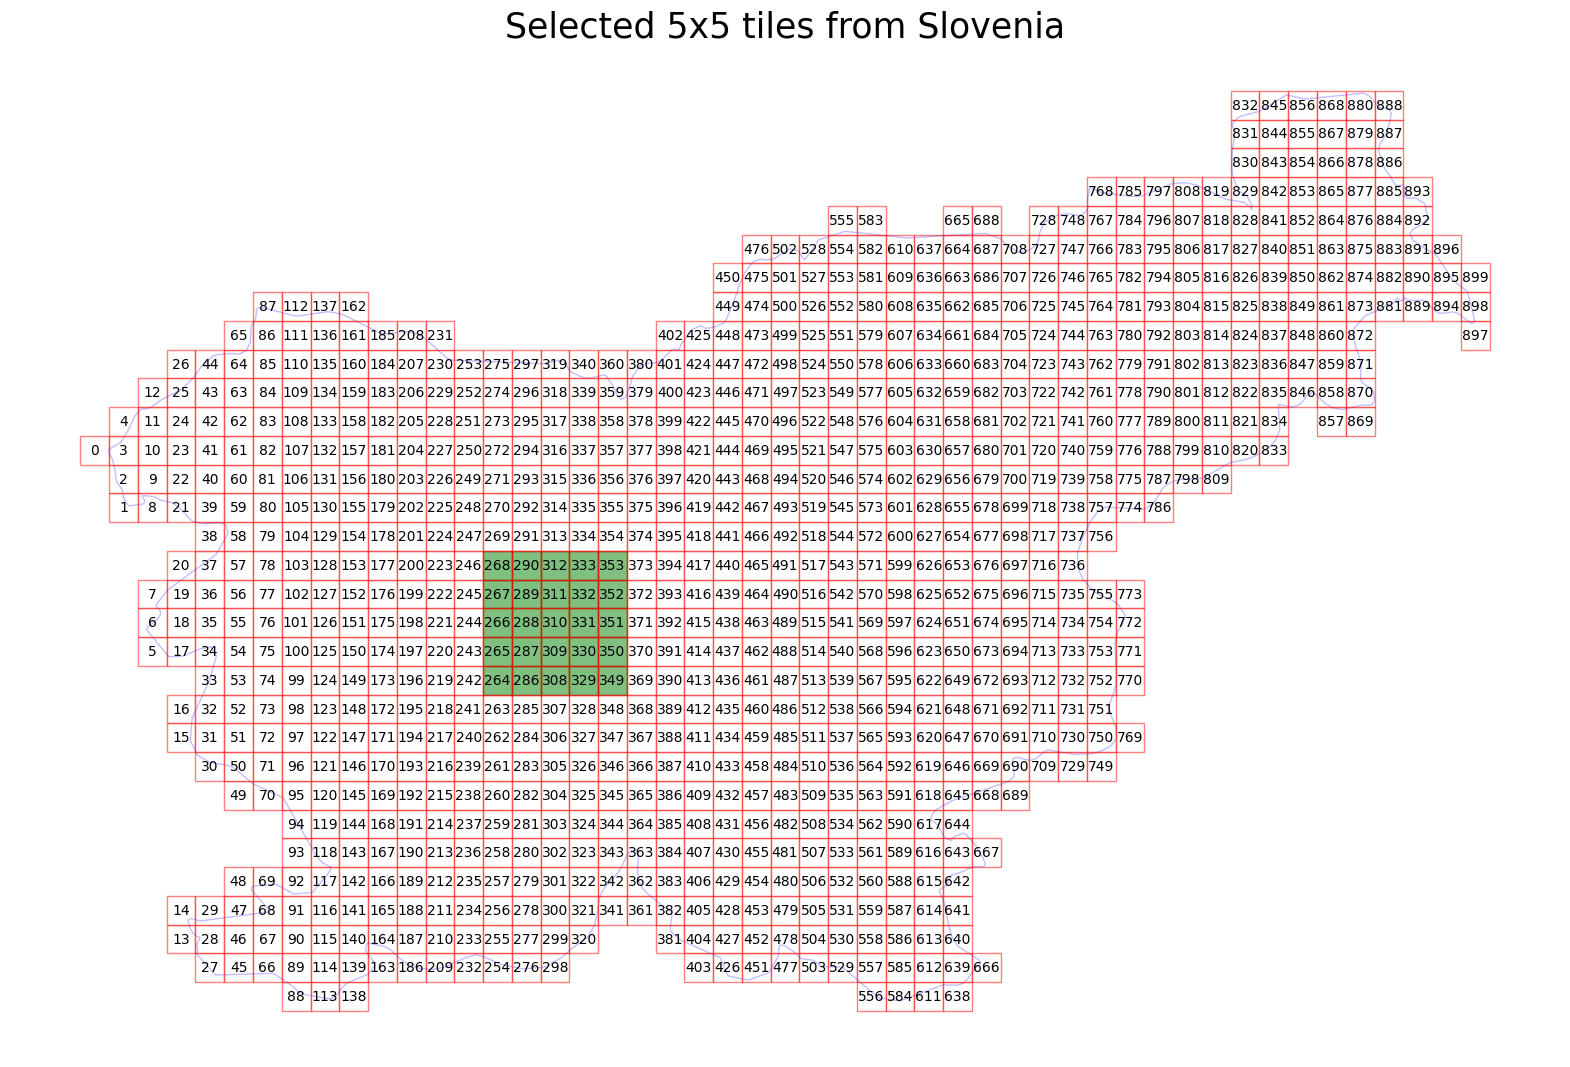

In [29]:
# Display bboxes over country
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title("Selected 5x5 tiles from Slovenia", fontsize=25)
prepare_shape(path).plot(ax=ax, facecolor="w", edgecolor="b", alpha=0.5)
gdf.plot(ax=ax, facecolor="w", edgecolor="r", alpha=0.5)

for i, row in gdf.iterrows():
    geo = row["geometry"]
    ax.text(geo.centroid.x, geo.centroid.y, row["index"], ha="center", va="center")

# Mark bboxes of selected area
gdf[gdf.index.isin(patch_ids)].plot(ax=ax, facecolor="g", edgecolor="r", alpha=0.5)

plt.axis("off");

In [30]:
patch_ids

array([268, 290, 312, 333, 353, 267, 289, 311, 332, 352, 266, 288, 310,
       331, 351, 265, 287, 309, 330, 350, 264, 286, 308, 329, 349])

In [33]:
date = "30-10-2024"

patch = EOPatch.load(f"patches/{date}/patch_0", lazy_loading=True)

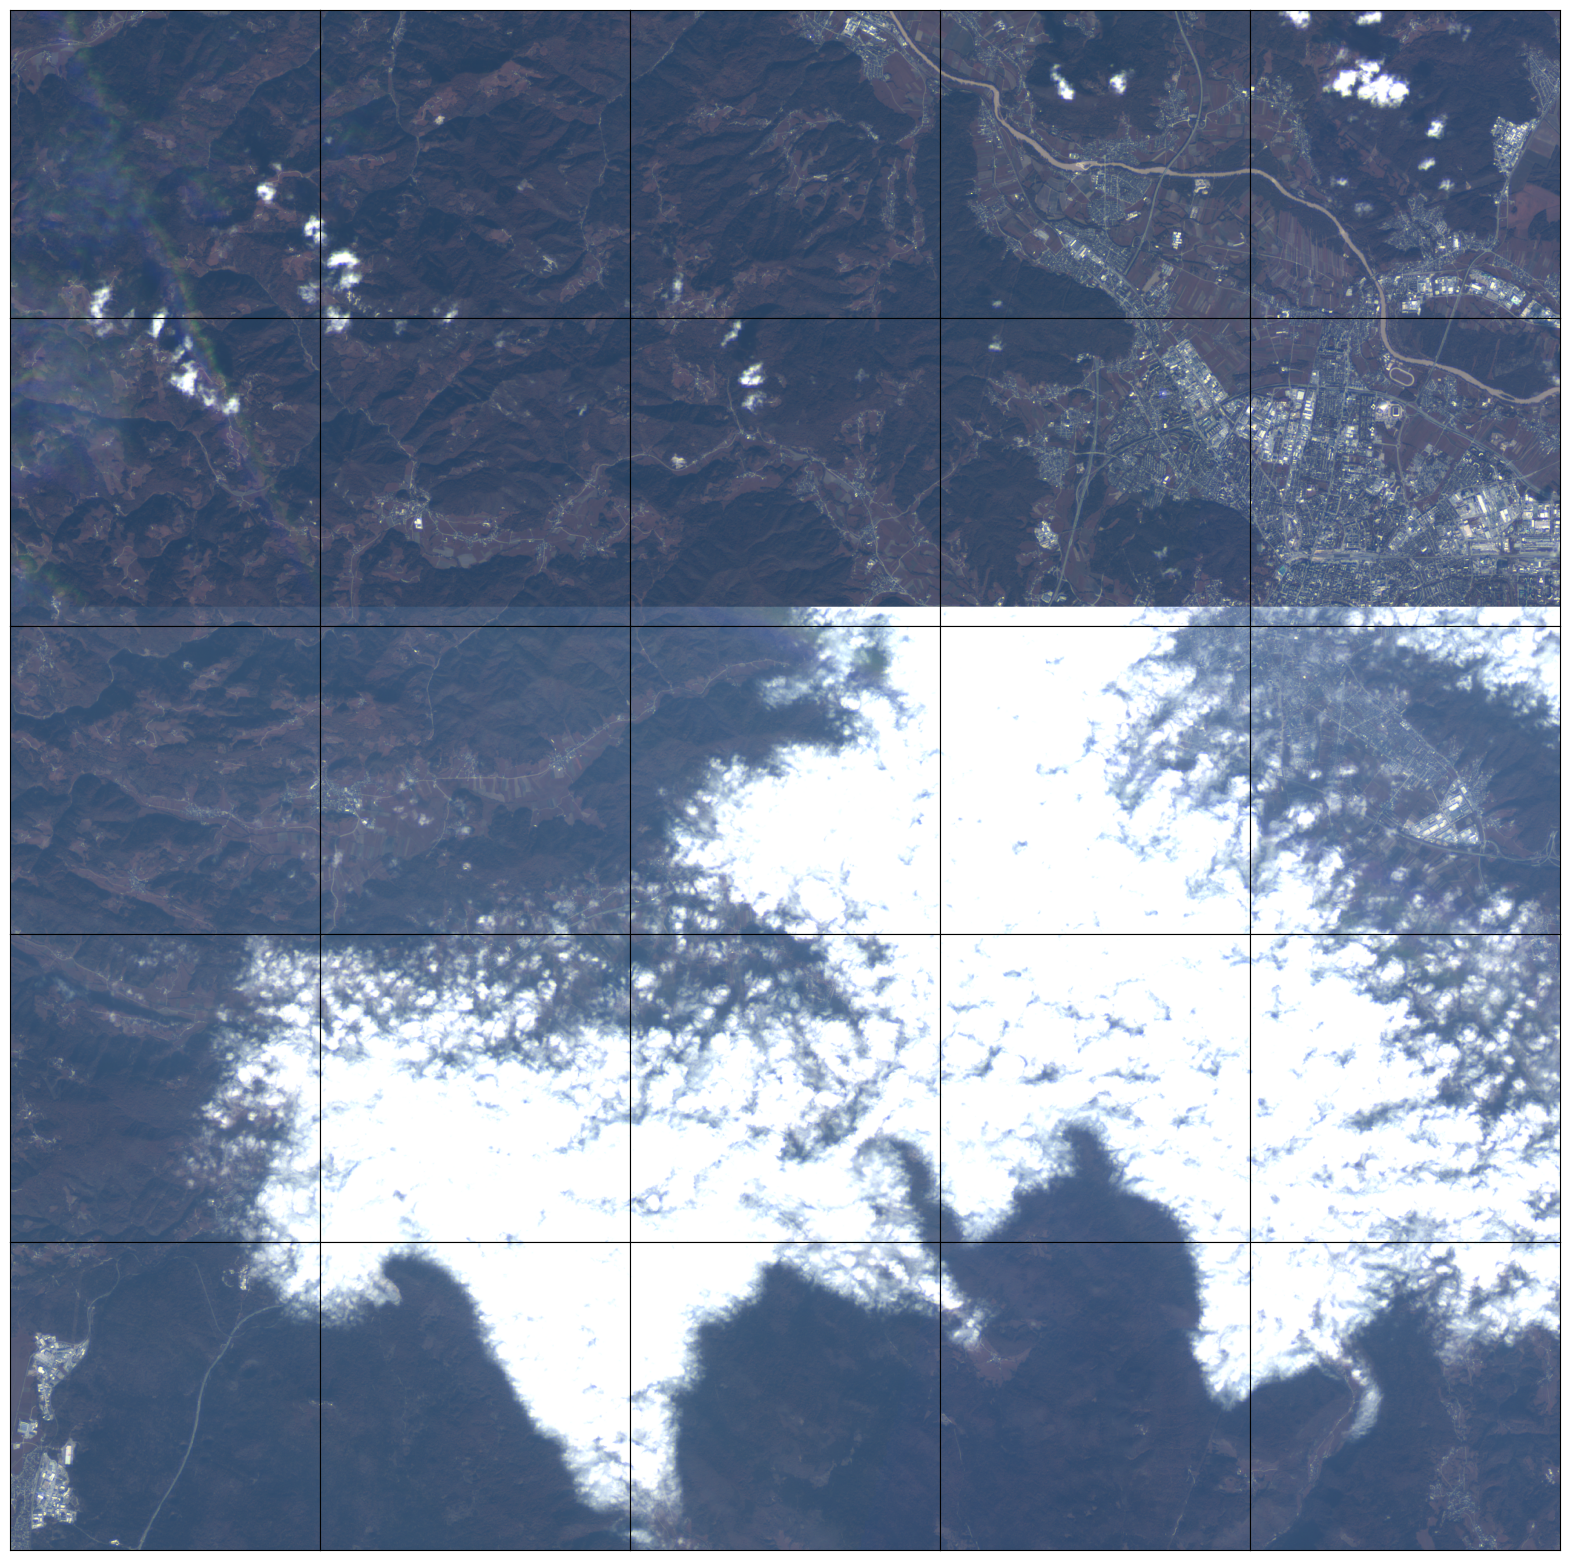

In [32]:
# Draw the RGB images
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))


for i, idx in enumerate(patch_ids):
    eopatch_path = f"patches/{date}/patch_{idx}"
    eopatch = EOPatch.load(eopatch_path, lazy_loading=True)

    ax = axs[i // 5][i % 5]
    ax.imshow(np.clip(eopatch.data["data"][0][..., [2, 1, 0]] * 3.5, 0, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    del eopatch

fig.subplots_adjust(wspace=0, hspace=0)

Setting chunk sizes to 5120x5120 m^2.


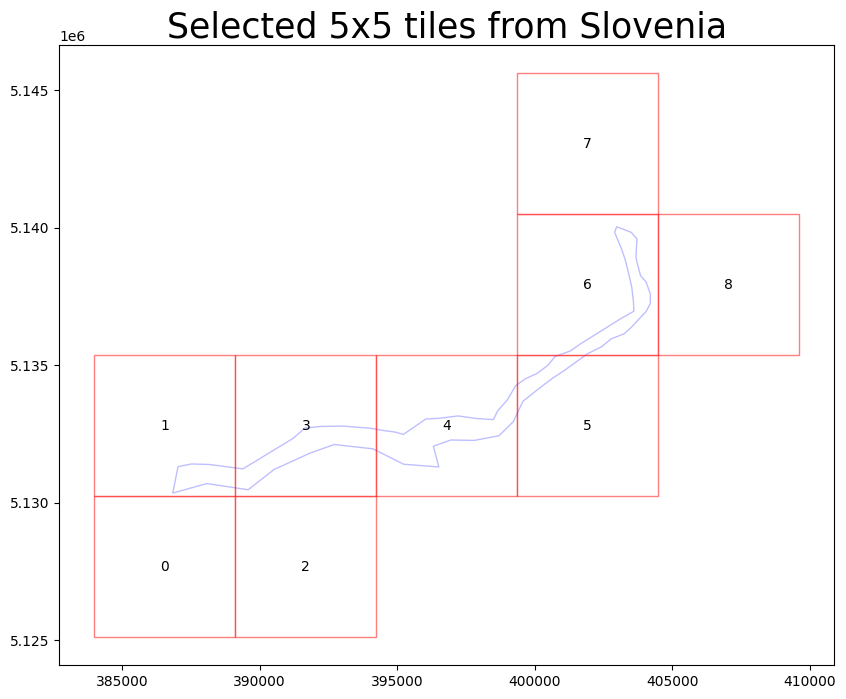

In [15]:
from importlib import reload

import  util.region as rg
reload(rg)

path = Path("data/soca_region.geojson")

gdf, bboxes = rg.prepare_chunks(path, patch_size=512)

# Display bboxes over 
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Selected 5x5 tiles from Slovenia", fontsize=25)
rg.prepare_shape(path).plot(ax=ax, facecolor="w", edgecolor="b", alpha=0.5)
gdf.plot(ax=ax, facecolor="w", edgecolor="r", alpha=0.5)

for i, row in gdf.iterrows():
    geo = row["geometry"]
    ax.text(geo.centroid.x, geo.centroid.y, row["index"], ha="center", va="center")

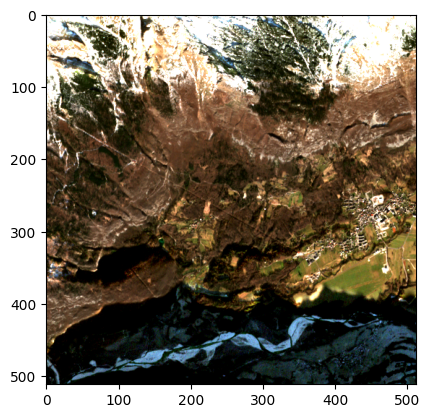

In [24]:
date = "23-1-2025"

patch = EOPatch.load(f"patches/{date}/patch_1", lazy_loading=True)
patch.data["data"].shape
plt.imshow(np.clip(patch.data["data"][0][..., [3, 2, 1]] * 7, 0, 1))
data = patch.data["data"]
inp = data[..., [3, 2, 1, 7, 10, 11]] * 2**16 * 7
import tifffile

tifffile.imwrite("test.tiff", inp)

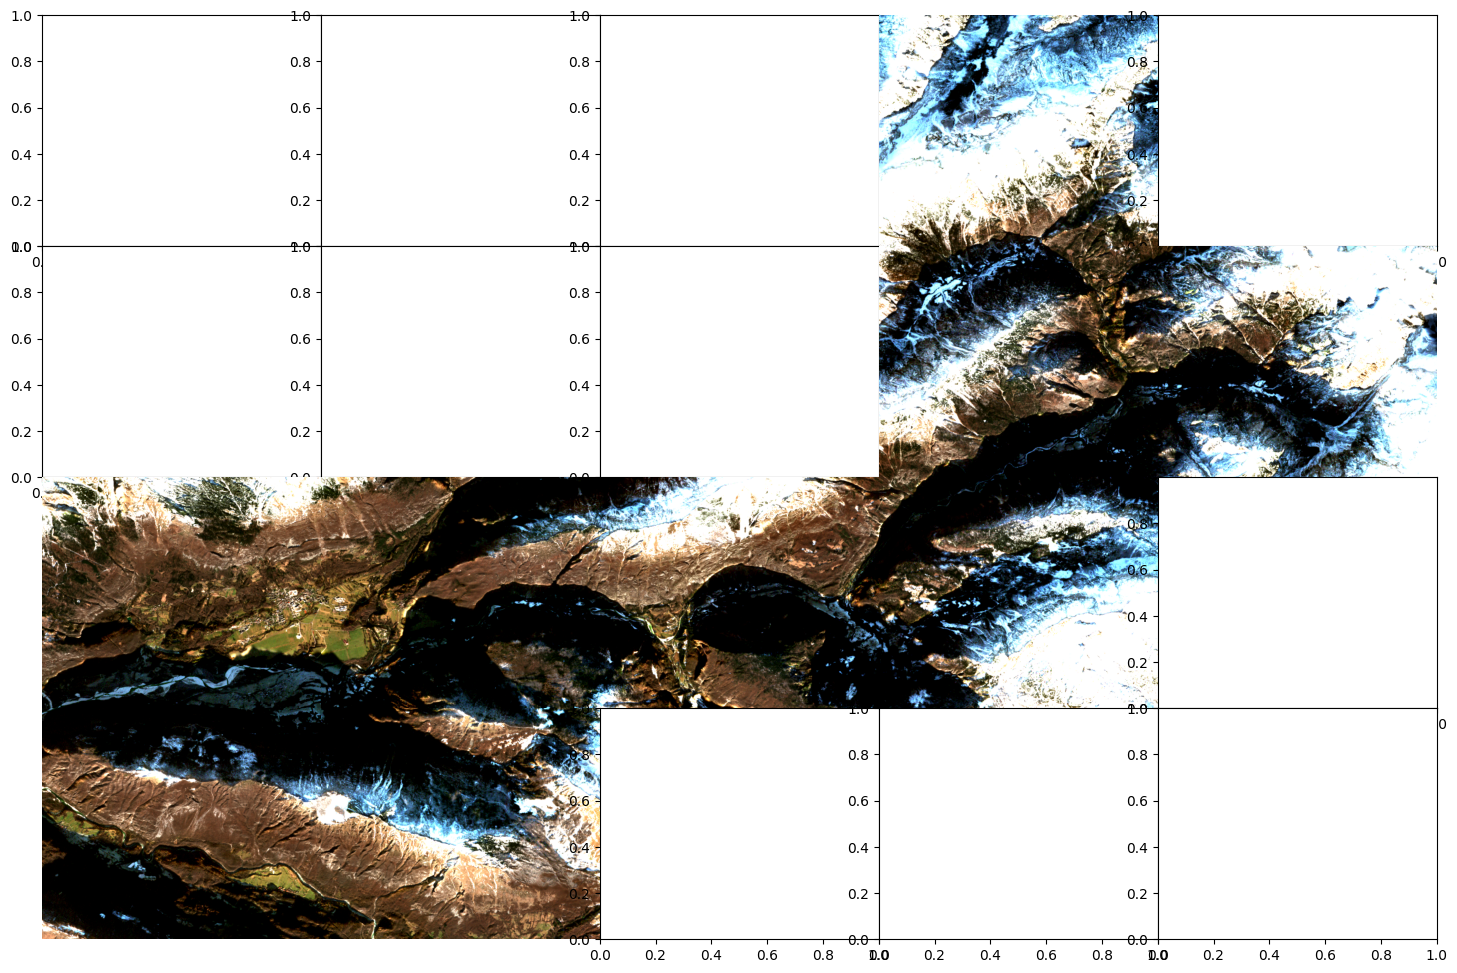

In [17]:
# Draw the RGB images
fig, axs = plt.subplots(nrows=gdf["index_y"].max() + 1, ncols=gdf["index_x"].max() + 1, figsize=(18, 12))

for i in range(len(gdf)):
    eopatch_path = f"patches/{date}/patch_{i}"
    eopatch = EOPatch.load(eopatch_path, lazy_loading=True)
    
    
    i, j = gdf["index_y"].max() - gdf.iloc[i]["index_y"], gdf.iloc[i]["index_x"]
    ax = axs[i, j]
    # B G R -> R G B
    # 2 3 4 -> 4 3 2 -> 3, 2, 1
    ax.imshow(np.clip(eopatch.data["data"][0][..., [3, 2, 1]] * 7, 0, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    del eopatch
    
    ax.axis("off")
fig.subplots_adjust(wspace=0, hspace=0)